In [46]:
import pandas as pd
import numpy as np
from numpy import argmax
import matplotlib.pyplot as plt
from tensorflow import keras
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import tensorflow
print(tensorflow.__version__)

2.1.0


In [2]:
data = pd.read_csv("D:/DS/zomato_restaurants_in_India/zomato_restaurants_in_India.csv")

In [3]:
data.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [4]:
data.shape

(211944, 26)

In [5]:
data.isnull().sum()

res_id                       0
name                         0
establishment                0
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64

In [41]:
import pandas_profiling
profile=pandas_profiling.ProfileReport(data)

In [42]:
profile.to_file(outputfile="D:/DS/zomato_restaurants_in_India/profileoutputafterfile.html")

In [4]:
data.drop(columns = ["url","zipcode","currency","country_id","takeaway"], inplace  =True)

In [5]:
data.shape

(211944, 21)

In [6]:
data.columns

Index(['res_id', 'name', 'establishment', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'locality_verbose', 'cuisines',
       'timings', 'average_cost_for_two', 'price_range', 'highlights',
       'aggregate_rating', 'rating_text', 'votes', 'photo_count',
       'opentable_support', 'delivery'],
      dtype='object')

In [7]:
data.head()

,res_id,name,establishment,address,city,city_id,locality,latitude,longitude,locality_verbose,...,timings,average_cost_for_two,price_range,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery
0,3400299,Bikanervala,['Quick Bites'],"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,"Khandari, Agra",...,8:30am – 10:30pm (Mon-Sun),700,2,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,"Agra Cantt, Agra",...,"12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",600,2,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1
2,3401013,Bhagat Halwai,['Quick Bites'],"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,"Shahganj, Agra",...,9:30 AM to 11 PM,300,1,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1
3,3400290,Bhagat Halwai,['Quick Bites'],"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,"Civil Lines, Agra",...,8am – 11pm (Mon-Sun),300,1,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,"Tajganj, Agra",...,11:30 AM to 11:30 PM,1000,3,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1


In [8]:
data.drop(columns = ["opentable_support","highlights","locality_verbose"], axis=1, inplace  =True)

In [9]:
data.columns

Index(['res_id', 'name', 'establishment', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'cuisines', 'timings',
       'average_cost_for_two', 'price_range', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'delivery'],
      dtype='object')

In [10]:
data.drop(columns = ["res_id","address","timings"], axis=1, inplace  =True)

In [11]:
data.columns

Index(['name', 'establishment', 'city', 'city_id', 'locality', 'latitude',
       'longitude', 'cuisines', 'average_cost_for_two', 'price_range',
       'aggregate_rating', 'rating_text', 'votes', 'photo_count', 'delivery'],
      dtype='object')

In [12]:
data.drop(columns=['locality','name'], axis=1, inplace=True)

In [13]:
data.head()

,establishment,city,city_id,latitude,longitude,cuisines,average_cost_for_two,price_range,aggregate_rating,rating_text,votes,photo_count,delivery
0,['Quick Bites'],Agra,34,27.211450,78.002381,"North Indian, South Indian, Mithai, Street Foo...",700,2,4.4,Very Good,814,154,-1
1,['Quick Bites'],Agra,34,27.160569,78.011583,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...",600,2,4.4,Very Good,1203,161,-1
2,['Quick Bites'],Agra,34,27.182938,77.979684,"Fast Food, Mithai",300,1,4.2,Very Good,801,107,1
3,['Quick Bites'],Agra,34,27.205668,78.004799,"Desserts, Bakery, Fast Food, South Indian",300,1,4.3,Very Good,693,157,1
4,['Casual Dining'],Agra,34,27.157709,78.052421,"North Indian, Continental, Italian",1000,3,4.9,Excellent,470,291,1


In [14]:
data['cuisines'] = data['cuisines'].str.replace(',' , '') 
data['cuisines'] = data['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
data['cuisines'].value_counts().head()

Indian North            15996
Chinese Indian North     6789
Fast Food                6721
Cafe                     6190
Indian South             5217
Name: cuisines, dtype: int64

In [26]:
#data['establishment']= data['establishment'].astype(str).str.replace

In [15]:
data['establishment'] = data['establishment'].str.replace(',' , '') 
data['establishment'] = data['establishment'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
data['establishment'].value_counts().head()

Bites'] ['Quick        64390
Dining'] ['Casual      61808
['Café']               22760
['Bakery']              8282
Parlour'] ['Dessert     7961
Name: establishment, dtype: int64

In [16]:
data['rating_text'] = data['rating_text'].str.replace(',' , '') 

In [17]:
data.head()

,establishment,city,city_id,latitude,longitude,cuisines,average_cost_for_two,price_range,aggregate_rating,rating_text,votes,photo_count,delivery
0,Bites'] ['Quick,Agra,34,27.211450,78.002381,Desserts Food Indian Indian Mithai North South...,700,2,4.4,Very Good,814,154,-1
1,Bites'] ['Quick,Agra,34,27.160569,78.011583,Chinese Fast Food Food Indian Mughlai North Ro...,600,2,4.4,Very Good,1203,161,-1
2,Bites'] ['Quick,Agra,34,27.182938,77.979684,Fast Food Mithai,300,1,4.2,Very Good,801,107,1
3,Bites'] ['Quick,Agra,34,27.205668,78.004799,Bakery Desserts Fast Food Indian South,300,1,4.3,Very Good,693,157,1
4,Dining'] ['Casual,Agra,34,27.157709,78.052421,Continental Indian Italian North,1000,3,4.9,Excellent,470,291,1


In [18]:
from sklearn.preprocessing import LabelEncoder
T = LabelEncoder()                 
data['city'] = T.fit_transform(data['city'])
data['establishment'] = T.fit_transform(data['establishment'])
data['cuisines'] = T.fit_transform(data['cuisines'])

In [19]:
data.head()

,establishment,city,city_id,latitude,longitude,cuisines,average_cost_for_two,price_range,aggregate_rating,rating_text,votes,photo_count,delivery
0,1,0,34,27.211450,78.002381,5314,700,2,4.4,Very Good,814,154,-1
1,1,0,34,27.160569,78.011583,4464,600,2,4.4,Very Good,1203,161,-1
2,1,0,34,27.182938,77.979684,5597,300,1,4.2,Very Good,801,107,1
3,1,0,34,27.205668,78.004799,1709,300,1,4.3,Very Good,693,157,1
4,4,0,34,27.157709,78.052421,5137,1000,3,4.9,Excellent,470,291,1


In [24]:
data.shape

(211944, 13)

In [25]:
data.drop(columns=['latitude','longitude'], axis=1, inplace=True)

In [26]:
data.head()

,establishment,city,city_id,cuisines,average_cost_for_two,price_range,aggregate_rating,rating_text,votes,photo_count,delivery
0,1,0,34,5314,700,2,4.4,Very Good,814,154,-1
1,1,0,34,4464,600,2,4.4,Very Good,1203,161,-1
2,1,0,34,5597,300,1,4.2,Very Good,801,107,1
3,1,0,34,1709,300,1,4.3,Very Good,693,157,1
4,4,0,34,5137,1000,3,4.9,Excellent,470,291,1


In [27]:
data.drop(columns=['city','city_id'], axis=1, inplace=True)

In [28]:
data.head()

,establishment,cuisines,average_cost_for_two,price_range,aggregate_rating,rating_text,votes,photo_count,delivery
0,1,5314,700,2,4.4,Very Good,814,154,-1
1,1,4464,600,2,4.4,Very Good,1203,161,-1
2,1,5597,300,1,4.2,Very Good,801,107,1
3,1,1709,300,1,4.3,Very Good,693,157,1
4,4,5137,1000,3,4.9,Excellent,470,291,1


In [29]:
data.shape

(211944, 9)

In [22]:
data.rating_text.nunique()

39

In [21]:
data.rating_text.unique()

array(['Very Good', 'Excellent', 'Good', 'Average', 'Not rated', 'Poor',
       'Dobré', 'Baik', 'Sangat Baik', 'Excelente', 'Bardzo dobrze',
       'Wybitnie', 'Ottimo', 'Muito Bom', 'Velmi dobré', 'Skvělá volba',
       'Muy Bueno', 'Bom', 'İyi', 'Çok iyi', 'Harika', 'Terbaik',
       'Skvělé', 'Průměr', 'Ortalama', 'Bueno', 'Eccellente', 'Muito bom',
       'Dobrze', 'Buono', 'Média', 'Scarso', 'Promedio', 'Veľmi dobré',
       'Vynikajúce', 'Średnio', 'Priemer', 'Biasa', 'Media'], dtype=object)

In [64]:
X = data.drop(['rating_text','delivery'],axis = 1)

In [65]:
X.shape

(211944, 7)

In [66]:
X = X.astype('float32')

In [67]:
X

,establishment,cuisines,average_cost_for_two,price_range,aggregate_rating,votes,photo_count
0,1.0,5314.0,700.0,2.0,4.4,814.0,154.0
1,1.0,4464.0,600.0,2.0,4.4,1203.0,161.0
2,1.0,5597.0,300.0,1.0,4.2,801.0,107.0
3,1.0,1709.0,300.0,1.0,4.3,693.0,157.0
4,4.0,5137.0,1000.0,3.0,4.9,470.0,291.0
5,1.0,5608.0,400.0,2.0,4.0,707.0,62.0
6,1.0,4503.0,500.0,2.0,4.2,647.0,46.0
7,1.0,5608.0,400.0,2.0,3.8,617.0,18.0
8,12.0,1736.0,500.0,2.0,3.4,322.0,14.0
9,15.0,1555.0,1000.0,3.0,4.4,289.0,324.0


In [68]:
y = data['rating_text']

In [69]:
y.shape

(211944,)

In [70]:
y

0         Very Good
1         Very Good
2         Very Good
3         Very Good
4         Excellent
5         Very Good
6         Very Good
7              Good
8           Average
9         Very Good
10        Very Good
11        Very Good
12        Very Good
13        Very Good
14        Very Good
15             Good
16        Excellent
17        Very Good
18        Very Good
19        Very Good
20             Good
21             Good
22        Excellent
23        Very Good
24        Very Good
25        Very Good
26             Good
27        Very Good
28             Good
29        Excellent
            ...    
211914    Very Good
211915         Good
211916         Good
211917         Good
211918    Very Good
211919         Good
211920         Good
211921    Very Good
211922         Good
211923    Very Good
211924         Good
211925    Very Good
211926         Good
211927    Excellent
211928    Excellent
211929         Good
211930         Good
211931    Excellent
211932    Very Good


In [71]:
# encode strings to integer
y = LabelEncoder().fit_transform(y)

In [72]:
y

array([32, 32, 32, ..., 32, 12, 32])

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 33)

In [74]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(148360, 7) (63584, 7) (148360,) (63584,)


In [127]:
X_train

,establishment,cuisines,average_cost_for_two,price_range,aggregate_rating,votes,photo_count
1440,4.0,6015.0,400.0,2.0,4.0,225.0,10.0
83038,3.0,4720.0,150.0,1.0,3.0,9.0,1.0
34097,6.0,2718.0,400.0,1.0,4.5,645.0,402.0
71048,1.0,5608.0,400.0,2.0,3.9,251.0,141.0
89515,15.0,3677.0,1000.0,3.0,4.0,1444.0,2042.0
184499,10.0,5471.0,200.0,1.0,3.9,34.0,4.0
150593,1.0,6015.0,200.0,1.0,0.0,1.0,1.0
148492,15.0,2238.0,450.0,2.0,4.1,378.0,146.0
72146,15.0,2332.0,650.0,2.0,3.1,87.0,93.0
170555,1.0,4810.0,400.0,2.0,4.0,172.0,7.0


In [79]:
print('y_train values =', y_train)
print('y_test values =', y_test)

y_train values = [32  0 11 ... 32 32 19]
y_test values = [12 12 12 ...  0 12 19]


In [80]:
# determine the number of input features
n_features = X_train.shape[1]
n_features

7

In [97]:
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(40, activation='softmax'))

In [93]:
model.layers

In [98]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 10)                80        
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_18 (Dense)             (None, 40)                360       
Total params: 528
Trainable params: 528
Non-trainable params: 0
_________________________________________________________________


In [99]:
# compile the model
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [121]:
#log_dir="D:/DS/logs/scalars/"
import os as os
#from datetime import datetime
from datetime import datetime as dt
from packaging import version
log_dir = os.path.join("logs", "fit", dt.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1)

#NUM_EPOCHS = 10
#data_size = 1000
# 80% of the data is for training.
#train_pct = 0.8

#train_size = int(data_size * train_pct)
BATCH_SIZE = 100

print("Training ... With parameters, this may take more than 10 seconds.")
training_history = model.fit(X_train, y_train,epochs=150, batch_size= BATCH_SIZE,
    verbose=2, # Suppress chatty output; use Tensorboard instead
    validation_data=(X_test, y_test),
    callbacks=[tensorboard_callback],
)

print("Average test loss: ", np.average(training_history.history['loss']))

Training ... With parameters, this may take more than 10 seconds.
Train on 148360 samples, validate on 63584 samples
Epoch 1/150
148360/148360 - 4s - loss: 0.3381 - accuracy: 0.8917 - val_loss: 0.3219 - val_accuracy: 0.8833
Epoch 2/150
148360/148360 - 4s - loss: 0.3459 - accuracy: 0.8900 - val_loss: 0.2926 - val_accuracy: 0.9384
Epoch 3/150
148360/148360 - 4s - loss: 0.3439 - accuracy: 0.8883 - val_loss: 0.3175 - val_accuracy: 0.9118
Epoch 4/150
148360/148360 - 3s - loss: 0.3299 - accuracy: 0.8990 - val_loss: 0.3480 - val_accuracy: 0.8834
Epoch 5/150
148360/148360 - 4s - loss: 0.3751 - accuracy: 0.8787 - val_loss: 0.3229 - val_accuracy: 0.9027
Epoch 6/150
148360/148360 - 3s - loss: 0.3325 - accuracy: 0.8981 - val_loss: 0.4879 - val_accuracy: 0.7863
Epoch 7/150
148360/148360 - 4s - loss: 0.3631 - accuracy: 0.8790 - val_loss: 0.3359 - val_accuracy: 0.8858
Epoch 8/150
148360/148360 - 3s - loss: 0.3330 - accuracy: 0.8945 - val_loss: 0.3097 - val_accuracy: 0.9281
Epoch 9/150
148360/148360 -

Epoch 76/150
148360/148360 - 4s - loss: 0.3140 - accuracy: 0.9072 - val_loss: 0.2861 - val_accuracy: 0.9117
Epoch 77/150
148360/148360 - 3s - loss: 0.2885 - accuracy: 0.9173 - val_loss: 0.2568 - val_accuracy: 0.9399
Epoch 78/150
148360/148360 - 3s - loss: 0.3277 - accuracy: 0.9075 - val_loss: 0.2666 - val_accuracy: 0.9359
Epoch 79/150
148360/148360 - 3s - loss: 0.2985 - accuracy: 0.9108 - val_loss: 0.2503 - val_accuracy: 0.9424
Epoch 80/150
148360/148360 - 4s - loss: 0.3225 - accuracy: 0.9084 - val_loss: 0.2702 - val_accuracy: 0.9104
Epoch 81/150
148360/148360 - 3s - loss: 0.3363 - accuracy: 0.9019 - val_loss: 0.4331 - val_accuracy: 0.8173
Epoch 82/150
148360/148360 - 4s - loss: 0.2715 - accuracy: 0.9233 - val_loss: 0.2369 - val_accuracy: 0.9570
Epoch 83/150
148360/148360 - 3s - loss: 0.3316 - accuracy: 0.9056 - val_loss: 0.2391 - val_accuracy: 0.9634
Epoch 84/150
148360/148360 - 4s - loss: 0.2828 - accuracy: 0.9236 - val_loss: 0.3175 - val_accuracy: 0.8586
Epoch 85/150
148360/148360 -

In [122]:
##Test the model##
test_loss, test_accuracy = model.evaluate(X_test,y_test)

63584/63584 [==============================] - 2s 27us/sample - loss: 0.3454 - accuracy: 0.8503


In [123]:
print('Test Accuracy: %.3f' % test_accuracy)

Test Accuracy: 0.850


In [124]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: %.3f' % acc)
#print('Test Loss: %.3f' % loss)

63584/63584 [==============================] - 2s 27us/sample - loss: 0.3454 - accuracy: 0.8503
Test Accuracy: 0.850


In [125]:
# make a prediction
row = [13.0,4314.0,700.0,2.0,4.5,406.0,235.0]

ypred = model.predict([row])
print('Predicted: %s (class=%d)' % (ypred, argmax(ypred)))

Predicted: [[5.9208931e-14 2.5928847e-07 2.3324672e-05 2.0972236e-34 2.2860512e-07
  4.1557307e-08 1.3694969e-07 1.2837784e-08 1.2247359e-07 1.9826035e-05
  8.8067667e-04 6.8773550e-01 1.4467972e-05 1.0856103e-04 2.3846689e-09
  1.6780596e-05 1.2916898e-06 1.5937924e-04 1.9656350e-09 0.0000000e+00
  8.0629808e-10 4.9336504e-06 2.2084654e-30 2.0688429e-09 1.7549638e-09
  2.4967792e-11 1.6299045e-05 3.6074704e-12 5.3031798e-08 2.0136475e-04
  9.9673089e-05 9.4292791e-06 3.1062323e-01 2.3489738e-06 6.0240773e-06
  1.8146106e-05 5.7744310e-05 2.5088309e-07 4.7930051e-09 0.0000000e+00]] (class=11)


In [128]:
row1 =[4.0,6015.0,400.0,2.0,4.0,225.0,10.0]
ypred1 = model.predict([row1])
print('Predicted: %s (class=%d)' % (ypred1, argmax(ypred1)))

Predicted: [[1.00188811e-06 1.32042056e-04 3.05489433e-04 9.01204020e-27
  1.07580337e-04 3.11658659e-05 8.20014029e-05 9.08187485e-06
  8.82493550e-05 1.17794531e-04 4.23429708e-04 1.79638006e-02
  6.99817464e-02 2.49533274e-04 5.77906530e-06 3.55814875e-04
  8.55008548e-05 8.93571298e-04 5.99753457e-06 0.00000000e+00
  2.59197782e-06 1.90130231e-04 2.22805156e-19 2.55591385e-06
  5.57251178e-06 4.86143904e-07 3.97935539e-04 3.92729653e-08
  2.70114997e-05 4.08430380e-04 4.24600788e-04 3.00414162e-04
  9.06117857e-01 1.53033921e-04 1.17949436e-04 1.91042287e-04
  7.33484165e-04 7.90406775e-05 8.25428924e-06 2.07324525e-31]] (class=32)


In [114]:
print(model.history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


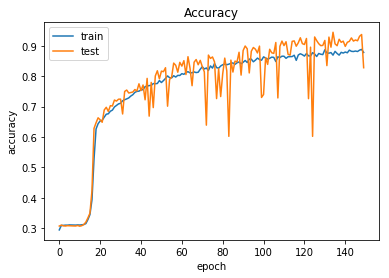

In [118]:
# summarize history for accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title("Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

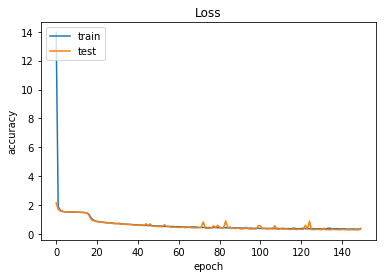

In [120]:
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title("Loss")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### RandomForestRegressor

In [107]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

c:\users\prade\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [108]:
rfr.score(X_test,y_test)*100

99.51755331038736

In [111]:
Randpred = pd.DataFrame({ "actual": y_test, "pred": y_pred_rfr })
Randpred

,actual,pred
0,12,12.000000
1,12,12.000000
2,12,12.000000
3,12,12.000000
4,32,32.000000
5,32,32.000000
6,32,32.000000
7,12,12.000000
8,12,12.000000
9,12,12.000000


In [112]:
data_rating =data

In [113]:
data_rating.head()

,establishment,cuisines,average_cost_for_two,price_range,aggregate_rating,rating_text,votes,photo_count,delivery
0,1,5314,700,2,4.4,Very Good,814,154,-1
1,1,4464,600,2,4.4,Very Good,1203,161,-1
2,1,5597,300,1,4.2,Very Good,801,107,1
3,1,1709,300,1,4.3,Very Good,693,157,1
4,4,5137,1000,3,4.9,Excellent,470,291,1
